In [83]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib widget

from sklearn.preprocessing import MinMaxScaler

from keras.models import Sequential
from keras.layers import LSTM, Dense


In [2]:
df = pd.read_csv("BTC-USD.csv")

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
1,2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2,2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
3,2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
4,2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100


In [4]:
df.shape

(2713, 7)

In [5]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,2713.000000,2713.000000,2713.000000,2713.000000,2713.000000,2.713000e+03
mean,11311.041069,11614.292482,10975.555057,11323.914637,11323.914637,1.470462e+10
std,16106.428891,16537.390649,15608.572560,16110.365010,16110.365010,2.001627e+10
min,176.897003,211.731003,171.509995,178.102997,178.102997,5.914570e+06
25%,606.396973,609.260986,604.109985,606.718994,606.718994,7.991080e+07
50%,6301.569824,6434.617676,6214.220215,6317.609863,6317.609863,5.098183e+09
75%,10452.399414,10762.644531,10202.387695,10462.259766,10462.259766,2.456992e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,67566.828125,3.509679e+11


In [27]:
closed=df[['Date','Close']]

In [8]:
closed.head()

,Date,Close
0,2014-09-17,457.334015
1,2014-09-18,424.440002
2,2014-09-19,394.795990
3,2014-09-20,408.903992
4,2014-09-21,398.821014


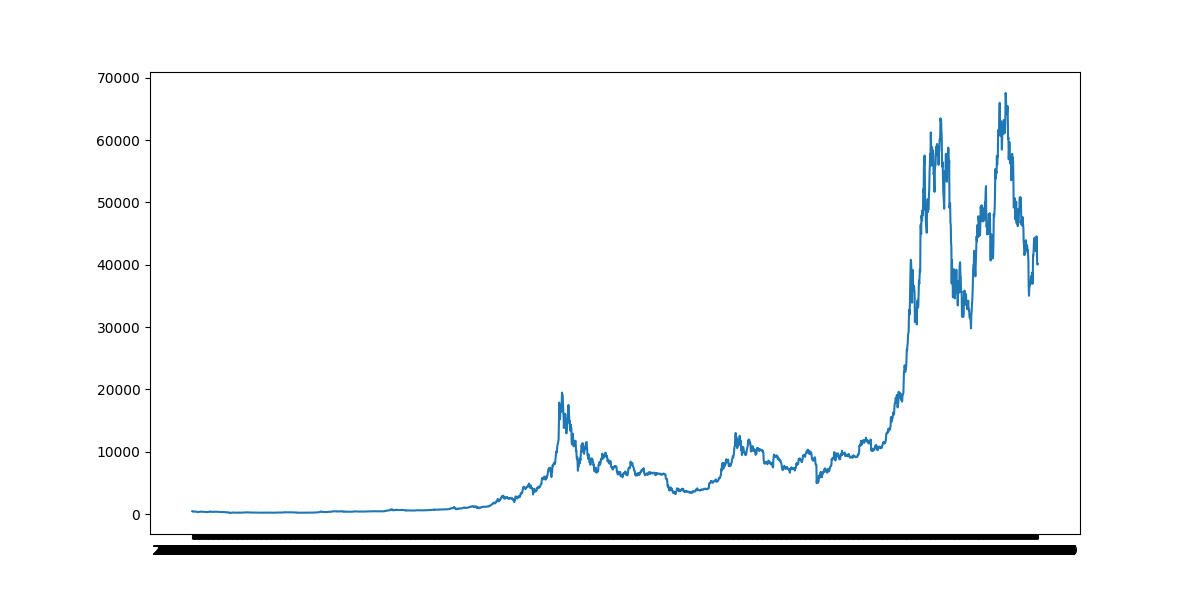

In [24]:
plt.close()

plt.figure(1,figsize=(12,6))

plt.plot(closed['Date'],closed['Close'])

plt.show()

In [28]:
price=closed[closed['Date'] >= '2021-01-01']

In [29]:
price

,Date,Close
2298,2021-01-01,29374.152344
2299,2021-01-02,32127.267578
2300,2021-01-03,32782.023438
2301,2021-01-04,31971.914063
2302,2021-01-05,33992.429688
...,...,...
2708,2022-02-15,44575.203125
2709,2022-02-16,43961.859375
2710,2022-02-17,40538.011719
2711,2022-02-18,40030.976563


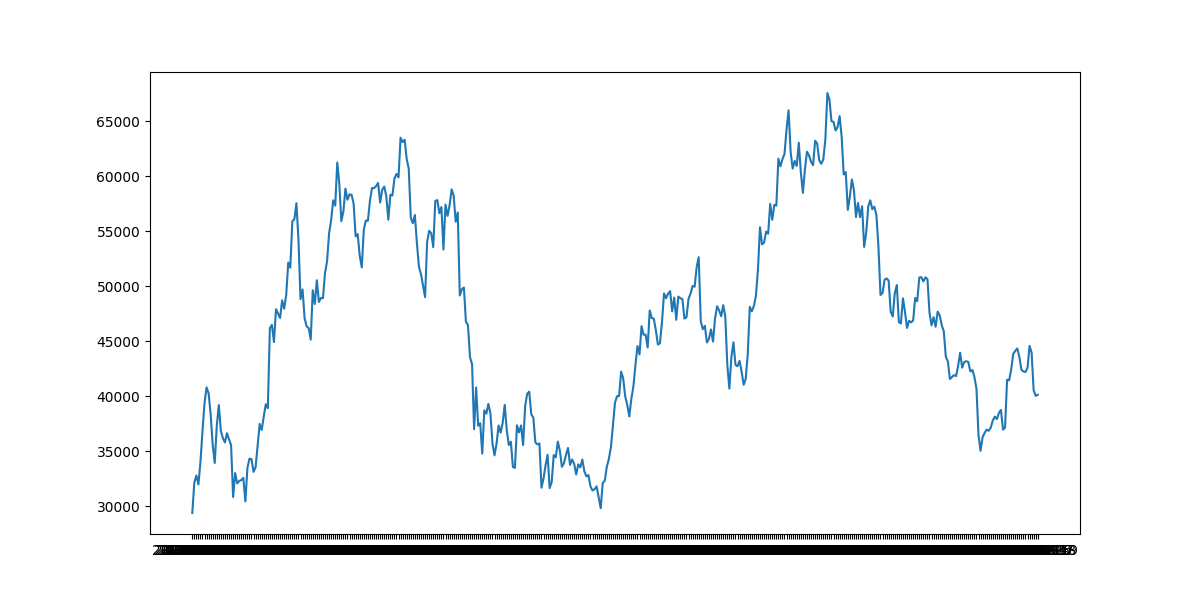

In [30]:
plt.close()

plt.figure(1,figsize=(12,6))

plt.plot(price['Date'],price['Close'])

plt.show()

In [38]:
x=price['Close']

x[0:5]

2298    29374.152344
2299    32127.267578
2300    32782.023438
2301    31971.914063
2302    33992.429688
Name: Close, dtype: float64


In [40]:
scaler=MinMaxScaler(feature_range=(0,1))
x=scaler.fit_transform(np.array(x).reshape(-1,1))

In [62]:
X_train=x[0:332]
X_test=x[332:]

In [55]:
X_train.shape

(332, 1)

In [64]:
X_test.shape

(83, 1)

In [98]:

x1=[]
y1=[]
a=[]
b=0
for i in range(len(X_train)-10-1):
    a=X_train[i:i+10,0]
    b=X_train[i+10,0]
    x1.append(a)
    y1.append(b)

X_train1=np.array(x1)
y_train1=np.array(y1)

print(X_train1.shape)

x1=[]
y1=[]
a=[]
b=0
for i in range(len(X_test)-10-1):
    a=X_test[i:i+10,0]
    b=X_test[i+10,0]
    x1.append(a)
    y1.append(b)

X_test1=np.array(x1)
y_test1=np.array(y1)


print(X_test1.shape)

(321, 10)
(72, 10)


In [99]:
# [ tedad , andaze , f  ]

X_train1=X_train1.reshape(321,10,1)
X_test1=X_test1.reshape(72,10,1)

print(X_train1.shape)
print(X_test1.shape)

(321, 10, 1)
(72, 10, 1)


In [100]:
model= Sequential()

model.add(LSTM(10,activation='relu',input_shape=(None,1)))
model.add(Dense(1))

model.compile(loss="mean_squared_error" , optimizer='adam')

In [101]:
h = model.fit(X_train1,y_train1, validation_data=(X_test1,y_test1),epochs=500,verbose=0)

In [102]:
train_predict=model.predict(X_train1)
test_predict=model.predict(X_test1)
train_predict.shape, test_predict.shape

3/3 [==============================] - 0s 2ms/step


((321, 1), (72, 1))

In [103]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)
original_ytrain = scaler.inverse_transform(y_train1.reshape(-1,1)) 
original_ytest = scaler.inverse_transform(y_test1.reshape(-1,1)) 

In [104]:
print("vaqeii: ",original_ytest[20])
print("robot:  ",test_predict[20])

vaqeii:  [46444.710938]
robot:   [48319.1]


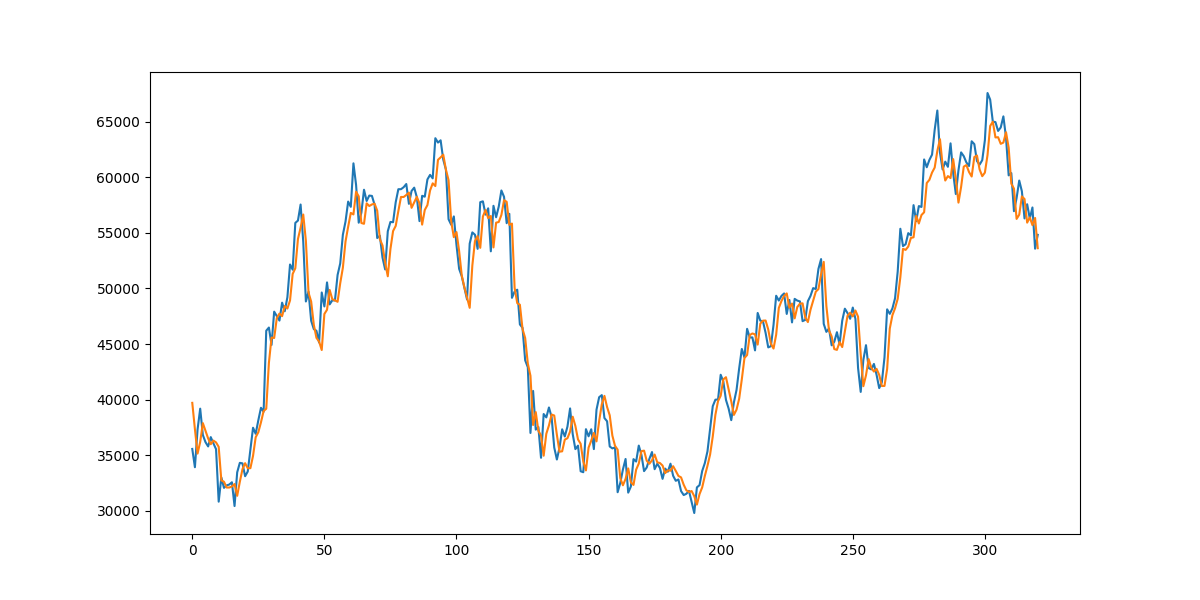

In [106]:
plt.close()


plt.figure(1,(12,6))


plt.plot(original_ytrain)

plt.plot(train_predict)

plt.show()

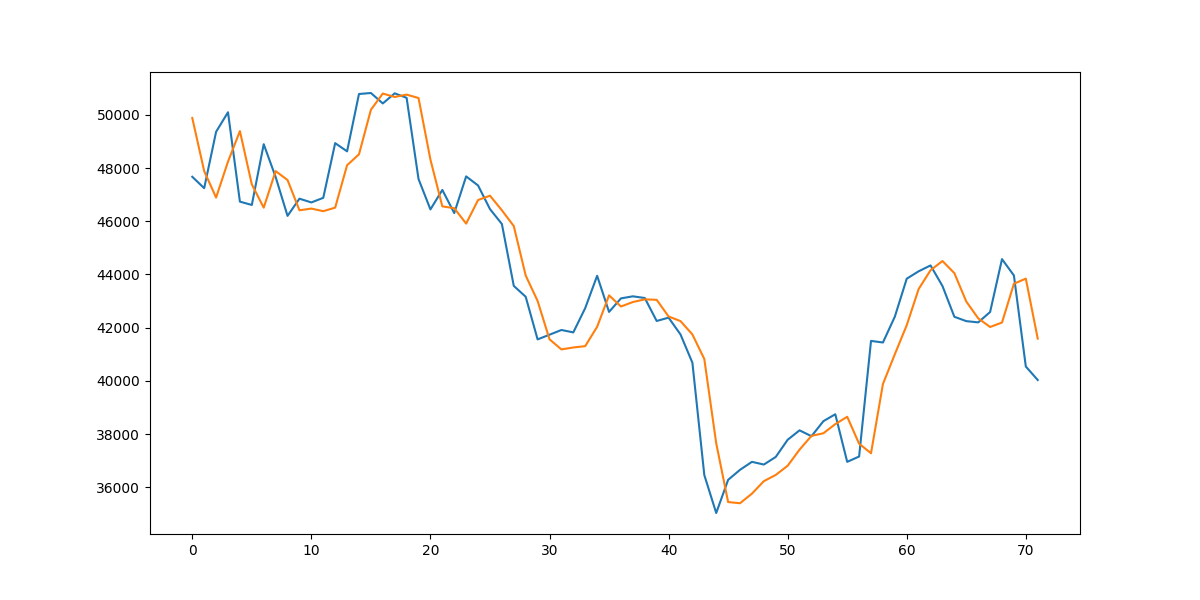

In [105]:
plt.close()


plt.figure(1,(12,6))


plt.plot(original_ytest)

plt.plot(test_predict)

plt.show()
